In [2]:
import pandas as pd

file_path = "../data/Modele_decisionnel.csv"
# Charger le fichier CSV
df = pd.read_csv(file_path, sep=';', header=None)
    
    # Nettoyage et restructuration des donn√©es
df_clean = df.iloc[2:6, 1:4].reset_index(drop=True)
df_clean.columns = ["Sol Sableux", "Sol Limoneux", "Sol Argileux"]
df_clean.index = ["Œ∏crit_min", "Œ∏crit_max", "Œ∏fc", "Œ∏wp"]
df_clean = df_clean.apply(pd.to_numeric)
    
    # Calculer Œ∏crit moyen
df_clean.loc["Œ∏crit"] = (df_clean.loc["Œ∏crit_min"] + df_clean.loc["Œ∏crit_max"]) / 2
    
    # Calculer les valeurs de Œ∏opt
df_clean.loc["Œ∏opt_racinaires_profonds"] = (df_clean.loc["Œ∏fc"] + df_clean.loc["Œ∏crit"]) / 2
df_clean.loc["Œ∏opt_racinaires_profonds_min"] = (df_clean.loc["Œ∏fc"] + df_clean.loc["Œ∏crit_min"]) / 2
df_clean.loc["Œ∏opt_racinaires_profonds_max"] = (df_clean.loc["Œ∏fc"] + df_clean.loc["Œ∏crit_max"]) / 2

df_clean.loc["Œ∏opt_racinaires_moyens"] = df_clean.loc["Œ∏fc"] - 0.1 * (df_clean.loc["Œ∏fc"] - df_clean.loc["Œ∏wp"])

df_clean.loc["Œ∏opt_racinaires_superficiels"] = df_clean.loc["Œ∏crit"] -5 + 0.1 * (df_clean.loc["Œ∏fc"] - df_clean.loc["Œ∏crit"]-5)    
df_clean.loc["Œ∏opt_racinaires_superficiels_min"] = df_clean.loc["Œ∏crit_min"]-5 + 0.1 * (df_clean.loc["Œ∏fc"] - df_clean.loc["Œ∏crit_min"]-5)
df_clean.loc["Œ∏opt_racinaires_superficiels_max"] = df_clean.loc["Œ∏crit_max"]-5 + 0.1 * (df_clean.loc["Œ∏fc"] - df_clean.loc["Œ∏crit_max"]-5)

df_clean.loc["Œ∏opt_racinaires_profonds","Sol Argileux"] = (df_clean.loc["Œ∏fc","Sol Argileux"] + df_clean.loc["Œ∏crit","Sol Argileux"]+5) / 2
df_clean.loc["Œ∏opt_racinaires_profonds_min","Sol Argileux"] = (df_clean.loc["Œ∏fc","Sol Argileux"] + df_clean.loc["Œ∏crit_min","Sol Argileux"]+5) / 2
df_clean.loc["Œ∏opt_racinaires_profonds_max","Sol Argileux"] = (df_clean.loc["Œ∏fc","Sol Argileux"] + df_clean.loc["Œ∏crit_max","Sol Argileux"]+5) / 2

df_clean.loc["Œ∏opt_racinaires_superficiels","Sol Argileux"] = df_clean.loc["Œ∏crit","Sol Argileux"] + 0.1 * (df_clean.loc["Œ∏fc","Sol Argileux"] - df_clean.loc["Œ∏crit","Sol Argileux"])    
df_clean.loc["Œ∏opt_racinaires_superficiels_min","Sol Argileux"] = df_clean.loc["Œ∏crit_min","Sol Argileux"] + 0.1 * (df_clean.loc["Œ∏fc","Sol Argileux"] - df_clean.loc["Œ∏crit_min","Sol Argileux"])
df_clean.loc["Œ∏opt_racinaires_superficiels_max","Sol Argileux"] = df_clean.loc["Œ∏crit_max","Sol Argileux"] + 0.1 * (df_clean.loc["Œ∏fc","Sol Argileux"] - df_clean.loc["Œ∏crit_max","Sol Argileux"])

print(df_clean)


                                  Sol Sableux  Sol Limoneux  Sol Argileux
Œ∏crit_min                                10.0          15.0          20.0
Œ∏crit_max                                12.0          17.0          22.0
Œ∏fc                                      15.0          25.0          40.0
Œ∏wp                                       5.0          10.0          20.0
Œ∏crit                                    11.0          16.0          21.0
Œ∏opt_racinaires_profonds                 13.0          20.5          33.0
Œ∏opt_racinaires_profonds_min             12.5          20.0          32.5
Œ∏opt_racinaires_profonds_max             13.5          21.0          33.5
Œ∏opt_racinaires_moyens                   14.0          23.5          38.0
Œ∏opt_racinaires_superficiels              5.9          11.4          22.9
Œ∏opt_racinaires_superficiels_min          5.0          10.5          22.0
Œ∏opt_racinaires_superficiels_max          6.8          12.3          23.8


In [4]:
# Sauvegarde en CSV
df_clean.to_csv('../data/Model_decisionnel_calcul_optimum.csv') 

[15. 25. 40.] [ 5. 10. 20.]


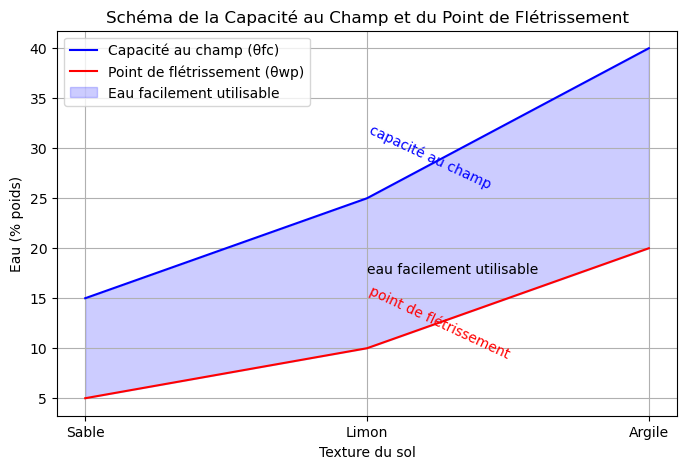

In [5]:
import matplotlib.pyplot as plt

# Extraire les valeurs n√©cessaires
textures = ["Sable", "Limon", "Argile"]
theta_fc = df_clean.loc["Œ∏fc"].values
theta_wp = df_clean.loc["Œ∏wp"].values

print(theta_fc, theta_wp)

# Tracer les courbes
plt.figure(figsize=(8,5))
plt.plot(textures, theta_fc, color='blue', label="Capacit√© au champ (Œ∏fc)")
plt.plot(textures, theta_wp, color='red', label="Point de fl√©trissement (Œ∏wp)")

# Ajouter annotations
plt.fill_between(textures, theta_wp, theta_fc, color='blue', alpha=0.2, label="Eau facilement utilisable")
plt.text(1, (theta_fc[1] + theta_wp[1]) / 2, "eau facilement utilisable", fontsize=10, rotation=0)
plt.text(1, theta_fc[1] + 1, "capacit√© au champ", fontsize=10, rotation=-25, color='blue')
plt.text(1, theta_wp[1] - 1, "point de fl√©trissement", fontsize=10, rotation=-25, color='red')

# Labels et titre
plt.xlabel("Texture du sol")
plt.ylabel("Eau (% poids)")
plt.title("Sch√©ma de la Capacit√© au Champ et du Point de Fl√©trissement")
plt.legend()
plt.grid(True)

# Afficher le graphique
plt.show()


[13.  20.5 33. ]
[14.  23.5 38. ]
[ 5.9 11.4 22.9]


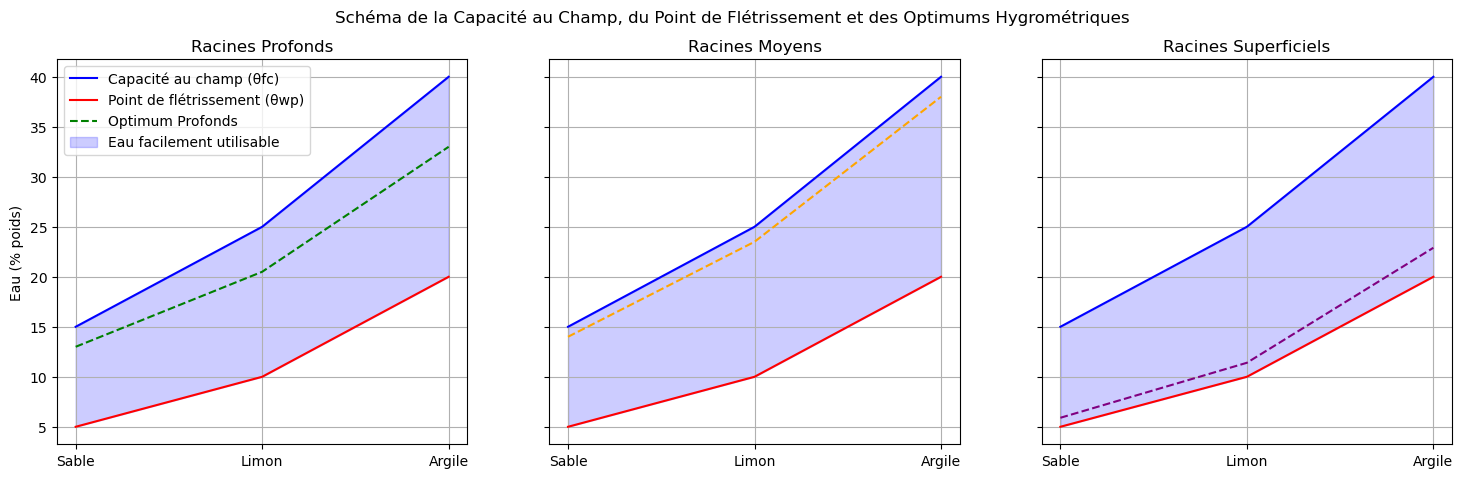

In [6]:
# Extraire les valeurs des diff√©rents types de racines
theta_opt_profonds = df_clean.loc["Œ∏opt_racinaires_profonds"].values
theta_opt_moyens = df_clean.loc["Œ∏opt_racinaires_moyens"].values
theta_opt_superficiels = df_clean.loc["Œ∏opt_racinaires_superficiels"].values

# Cr√©ation des graphiques
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

# Liste des types de racines
types_racines = ["Profonds", "Moyens", "Superficiels"]
theta_opts = [theta_opt_profonds, theta_opt_moyens, theta_opt_superficiels]
couleurs = ["green", "orange", "purple"]

for i, ax in enumerate(axes):
    ax.plot(textures, theta_fc, color='blue', label="Capacit√© au champ (Œ∏fc)")
    ax.plot(textures, theta_wp, color='red', label="Point de fl√©trissement (Œ∏wp)")
    ax.plot(textures, theta_opts[i], color=couleurs[i], linestyle='dashed', label=f"Optimum {types_racines[i]}")
    print(theta_opts[i])
    
    ax.fill_between(textures, theta_wp, theta_fc, color='blue', alpha=0.2, label="Eau facilement utilisable")
    
    ax.set_title(f"Racines {types_racines[i]}")
    ax.grid(True)

axes[0].set_ylabel("Eau (% poids)")
axes[0].legend()

# Affichage
plt.suptitle("Sch√©ma de la Capacit√© au Champ, du Point de Fl√©trissement et des Optimums Hygrom√©triques")
plt.show()


In [10]:
# optimum : 
# da : densit√© apparente du sol
# z : profondeur de sol consid√©r√© en dm.

# Variables globales
soil_types = {
    "sableux": {"da": 1.6, "humidity_flet": 5, "df_key": "Sol Sableux"},
    "limoneux": {"da": 1.3, "humidity_flet": 12, "df_key": "Sol Limoneux"},
    "argileux": {"da": 1.1, "humidity_flet": 27, "df_key": "Sol Argileux"}
}

root_types = {
    "superficielle": {"df_key": "Œ∏opt_racinaires_superficiels"},
    "moyenne": {"df_key": "Œ∏opt_racinaires_moyens"},
    "profonde": {"df_key": "Œ∏opt_racinaires_profonds"}
}


# Variables sp√©
pot_depth = 4  # Profondeur en dm d'un pot
pot_diameter = 4  # Diam√®tre en dm d'un pot

# Environnement
humidity_sol = 10
humidity_cible = 32.9

# Choisir le type de sol
selected_soil = "limoneux"

# Choisir le type de racine 
selected_root = "moyenne"


# R√©cup√©ration des valeurs pour le sol s√©lectionn√©
da = soil_types[selected_soil]["da"]
humidity_flet = soil_types[selected_soil]["humidity_flet"]
df_key_sol = soil_types[selected_soil]["df_key"]
df_key_root = root_types[selected_root]["df_key"]

# R√©cup√©ration des valeurs de Œ∏opt et Œ∏flet pour le sol s√©lectionn√©
Œ∏opt = df_clean.loc[df_key_root,df_key_sol]
Œ∏flet = df_clean.loc["Œ∏wp",df_key_sol]

da_echantillon = da + humidity_sol * da/100
da_cible = da + humidity_cible * da/100
da_flet = da + humidity_flet * da/100

# Calcul de la R√©serve Utile (RU en mm)
RU_obs = (((Œ∏opt/100)*da_echantillon - (Œ∏flet/100)*da_flet)/da)*100  * da * pot_depth
RU_cible = (((Œ∏opt/100)*da_cible - (Œ∏flet/100)*da_flet)/da)*100  * da * pot_depth

# Affichage du r√©sultat
print(f"RU = {RU_obs:.2f} mm")
print(f"RU = {RU_cible:.2f} mm")

surface = 3.14 * pot_diameter*100

vol_eau_cm3_obs = RU_obs/10 * surface
vol_eau_l_obs = vol_eau_cm3_obs/1000
print(vol_eau_l_obs)

vol_eau_cm3_cible = RU_cible/10 * surface
vol_eau_l_cible = vol_eau_cm3_cible/1000
print(vol_eau_l_cible)

if vol_eau_l_obs < vol_eau_l_cible:
    print("Il faut arroser de " + str(round(vol_eau_l_cible - vol_eau_l_obs,2)) + " litres")
else:
    print("Pas besoin d'arroser")

RU = 76.18 mm
RU = 104.16 mm
9.568207999999998
13.082973280000001
Il faut arroser de 3.51 litres


In [222]:
import math

def temps_avant_seuil(humidite_actuelle, humidite_critique, taux_baisse=0.85, heures_par_jour=24):
    """
    Calcule en combien de jours et d'heures l'humidit√© atteindra le seuil critique
    en diminuant de 5% par jour.

    :param humidite_actuelle: Humidit√© actuelle en pourcentage (%)
    :param humidite_critique: Seuil critique d'humidit√© en pourcentage (%)
    :param taux_baisse: Facteur de d√©croissance par jour (0.95 par d√©faut pour 5%)
    :param heures_par_jour: Nombre d'heures par jour (24h par d√©faut)
    :return: Tuple (jours, heures)
    """
    jours = 0

    while humidite_actuelle > humidite_critique:
        humidite_actuelle *= taux_baisse  # R√©duction de 5% par jour
        jours += 1

    # Calcul du temps fractionnaire (ex: si on atteint le seuil en 3.5 jours)
    reste_humidite = humidite_actuelle / taux_baisse
    ratio = (humidite_critique - reste_humidite) / (humidite_actuelle - reste_humidite)
    heures = math.ceil(ratio * heures_par_jour)  # Conversion en heures et arrondi au sup√©rieur

    return jours - 1, heures

# üî• Exemple d'utilisation :
humidite_actuelle = 32.9  # Humidit√© actuelle en %
humidite_critique = 10  # Seuil critique en %

jours, heures = temps_avant_seuil(humidite_actuelle, humidite_critique)
print(f"Seuil critique atteint dans {jours} jours et {heures} heures.")

Seuil critique atteint dans 7 jours et 9 heures.
